In [1]:
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200

In [2]:
a = np.array([[1, 2, 3, 4],
              [5, 6, 5, 6],
              [1, 2, 3, 4],
              [5, 6, 5, 7]])
print(a)

[[1 2 3 4]
 [5 6 5 6]
 [1 2 3 4]
 [5 6 5 7]]


In [3]:
def extrema_lokalne(a, n):
    """
    Znajduje ektrema lokalne tablicy dwuwymiarowej
    
    Parametry:
        a - tablica dwuwymiarowa, dla której mają być znalezione ektrema
        n - otoczenie punktu (musi być liczbą nieparzystą)
        
    Zwraca:
        maximum, minimum - dwie listy zawierające indeksy ekstremów lokalnych
                           pierwsza lista to maksima, a druga to minima
    """
    maximum, minimum = [], []
    for i, row in enumerate(a):
        for j, element in enumerate(row):
            check_array=[]
            for k in range(-n//2+1, n//2+1):
                if i+k<0:
                    continue
                for l in range(-n//2+1, n//2+1):
                    if j+l<0 or l==k==0:
                        continue
                    try:
                        check_array.append(a[i+k, j+l])
                    except IndexError:
                        continue
            if np.all(element>check_array):
                maximum.append((i, j))
            if np.all(element<check_array):
                minimum.append((i, j))
    return maximum, minimum

In [4]:
maksima, minima = extrema_lokalne(a, 3)
print('Maksyma lokalne:', maksima)
print('Minima lokalne:', minima)

Maksyma lokalne: [(1, 1), (1, 3), (3, 1), (3, 3)]
Minima lokalne: [(0, 0), (2, 0)]


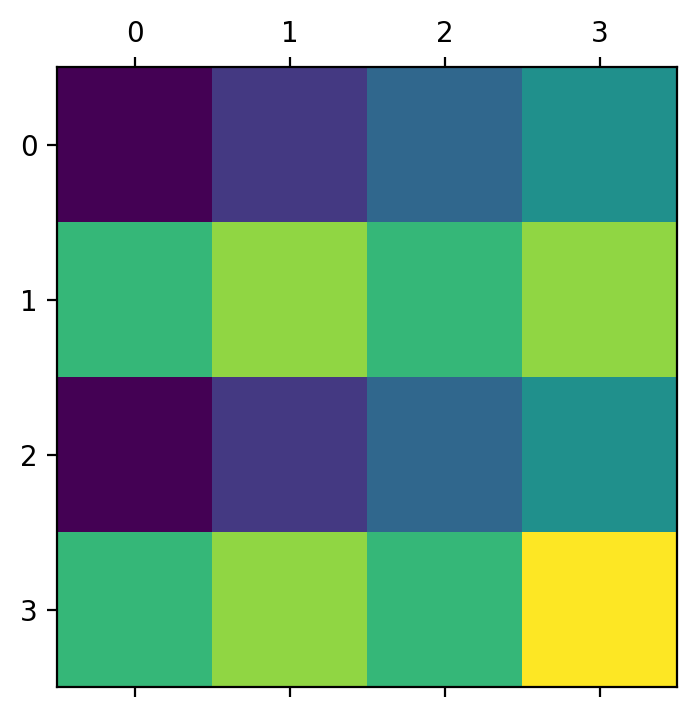

In [5]:
plt.matshow(a)
plt.show()

In [6]:
arr=np.array([[[7, 2, 3], [2, 3, 4], [4, 5, 6]],
            [[1, 2, 3], [2, 6, 4], [4, 5, 7]],
            [[1, 0, 3], [2, 3, 4], [4, 5, 6]]])

In [7]:
def extrema_lokalne_3d(A, N):
    """
    Znajduje ektrema lokalne tablicy trójwymiarowej

    Parametry:
        a - tablica trójwymiarowa, dla której mają być znalezione ektrema
        n - otoczenie punktu (musi być liczbą nieparzystą)

    Zwraca:
        maximum, minimum - dwie listy zawierające indeksy ekstremów lokalnych
                           pierwsza lista to maksima, a druga to minima
    """
    maximum, minimum = [], []
    for i, array in enumerate(A):
        for j, row in enumerate(array):
            for k, element in enumerate(row):
                check_array = []
                for l in range(-N // 2 + 1, N // 2 + 1):
                    if i + l < 0:
                        continue
                    for m in range(-N // 2 + 1, N // 2 + 1):
                        if j + m < 0:
                                continue
                        for n in range(-N // 2 + 1, N // 2 + 1):
                            if k + n < 0 or n == m == l == 0:
                                continue
                            try:
                                check_array.append(A[i + l, j + m, k + n])
                            except IndexError:
                                continue
                if np.all(element > check_array):
                    maximum.append((i, j, k))
                if np.all(element < check_array):
                    minimum.append((i, j, k))
    return maximum, minimum

In [8]:
maksima, minima = extrema_lokalne_3d(arr, 3)
print('Maksyma lokalne:', maksima)
print('Minima lokalne:', minima)

Maksyma lokalne: [(0, 0, 0), (1, 2, 2)]
Minima lokalne: [(2, 0, 1)]


In [9]:
def extrema_lokalne(a):
    """
    Znajduje ektrema lokalne tablicy dwuwymiarowej
    
    Parametry:
        a - tablica dwuwymiarowa, dla której mają być znalezione ektrema
        
    Zwraca:
        maximum, minimum - dwie listy zawierające indeksy ekstremów lokalnych
                           pierwsza lista to maksima, a druga to minima
    """
    maximum, minimum = [], []
    for i, row in enumerate(a):
        for j, element in enumerate(row):

            # Rogi
            if i==0 and j==0:
                check_array=np.array((a[1, 0], a[1, 1], a[0, 1]))
            elif i==len(a)-1 and j==len(row)-1:
                check_array=np.array((a[-2, -2], a[-2, -1], a[-1, -2]))
            elif i==len(a)-1 and j==0:
                check_array=np.array((a[-2, 0], a[-2, 1], a[-1, 1]))
            elif i==0 and j==len(row)-1:
                check_array=np.array((a[1, -2], a[1, -1], a[0, -2]))

            # Krawędzie
            elif i==0 and 0<j<len(row)-1:
                check_array=np.array((a[i, j-1], a[i, j+1], a[i+1, j-1], a[i+1, j], a[i+1, j+1]))
            elif 0<i<len(a)-1 and j==len(row)-1:
                check_array=np.array((a[i-1, j], a[i+1, j], a[i-1, j-1], a[i, j-1], a[i+1, j-1]))
            elif i==len(a)-1 and 0<j<len(row)-1:
                check_array=np.array((a[i, j-1], a[i, j+1], a[i-1, j-1], a[i-1, j], a[i-1, j+1]))
            elif 0<i<len(a)-1 and j==0:
                check_array=np.array((a[i-1, j], a[i+1, j], a[i-1, j+1], a[i, j+1], a[i+1, j+1]))

            # Centry
            else:
                check_array=np.array((a[i-1, j-1], a[i-1, j], a[i-1, j+1], a[i, j-1], a[i, j+1], a[i+1, j-1], a[i+1, j], a[i+1, j+1]))

            if np.all(element>check_array):
                maximum.append((i, j))
            if np.all(element<check_array):
                minimum.append((i, j))
    return maximum, minimum

In [10]:
maksima, minima = extrema_lokalne(a)
print('Maksyma lokalne:', maksima)
print('Minima lokalne:', minima)

Maksyma lokalne: [(1, 1), (1, 3), (3, 1), (3, 3)]
Minima lokalne: [(0, 0), (2, 0)]
